In [19]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import requests
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [30]:
#create a set of random latitude and longitude combinations

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [31]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [32]:
# Use the citipy module to determine city based on latitude and longitude.
import requests
from citipy import citipy

In [33]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

mahendranagar np
albany au
hami cn
englewood us
carnarvon au
mataura pf
rikitea pf
avarua ck
esperance au
vaini to
severnyy ru
noumea nc
bluff nz
bolitoc ph
ushuaia ar
tefe br
albany au
dawei mm
vaini to
langres fr
hermanus za
butaritari ki
sao carlos br
oranjemund na
afmadu so
samusu ws
ilulissat gl
cabo san lucas mx
touros br
bara sd
samusu ws
rikitea pf
punta arenas cl
frauenfeld ch
cape town za
barrow us
waingapu id
mar del plata ar
saint-philippe re
rikitea pf
ushuaia ar
souillac mu
butaritari ki
rikitea pf
new norfolk au
nikolskoye ru
busselton au
dzhebariki-khaya ru
cape town za
ushuaia ar
vaini to
finschhafen pg
kapaa us
grand river south east mu
provideniya ru
padang id
narsaq gl
mana gf
georgetown sh
tuktoyaktuk ca
sorong id
alugan ph
westport ie
hobart au
yellowknife ca
ribeira grande pt
rikitea pf
yeppoon au
bluff nz
kaitangata nz
soe id
airai pw
busselton au
abonnema ng
butaritari ki
mataura pf
mataura pf
albany au
leningradskiy ru
piacabucu br
kapuskasing ca
cabo san luca

busselton au
mar del plata ar
cape town za
hermanus za
mar del plata ar
andapa mg
husavik is
esperance au
kapaa us
jamestown sh
tabiauea ki
baruun-urt mn
ponta do sol cv
zeya ru
ilulissat gl
souillac mu
punta arenas cl
ribeira grande pt
barentsburg sj
mataura pf
busselton au
vardo no
cape town za
paveh ir
khatanga ru
sweetwater us
bereda so
grand gaube mu
sechura pe
mataura pf
katrineholm se
new norfolk au
atuona pf
goderich sl
mataura pf
avarua ck
ushuaia ar
road town vg
mahebourg mu
dikson ru
atuona pf
samarai pg
agadez ne
khasan ru
louisbourg ca
rikitea pf
vestmannaeyjar is
severo-kurilsk ru
salalah om
diamantino br
yellowknife ca
sawtell au
cape town za
lagoa pt
baruun-urt mn
norman wells ca
kodiak us
qaanaaq gl
beringovskiy ru
meiganga cm
jamestown sh
coquimbo cl
jumla np
puerto ayora ec
mango tg
mahebourg mu
avarua ck
puerto carreno co
fortuna us
bredasdorp za
taolanaro mg
arraial do cabo br
pochutla mx
provideniya ru
albany au
hermanus za
oreanda ua
tura ru
saint-philippe re
luk

In [38]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If the city is unique then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

612

In [42]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57b67004323d0bbd8c3f7594cb67adab


In [45]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

#for i, city in enumerate(cities):
#for i in range(len(cities)):
    #Group cities in sets of 50 for logging purposes
 #   if(i % 50 == 0 and i>=50):
  #      set_count += 1
   #     record_count = 1
    #create endpoint URL with each city
   # city_url = url+ "&q=" + city.replace("","+")
        
    #log the url, record and set numbers and the city
   # print(f"Processing Record {record_count} of Set {set_count}|{city}")
    
    # Add 1 to the record count
   # record_count +=1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

 # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")       

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mahendranagar
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | hami
Processing Record 4 of Set 1 | englewood
Processing Record 5 of Set 1 | carnarvon
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | esperance
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | severnyy
Processing Record 12 of Set 1 | noumea
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | bolitoc
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | tefe
Processing Record 17 of Set 1 | dawei
Processing Record 18 of Set 1 | langres
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | butaritari
Processing Record 21 of Set 1 | sao carlos
Processing Record 22 of Set 1 | oranjemund
Processing Record 23 of Set 1 | afmadu
City not found. Skippi

Processing Record 35 of Set 4 | zigong
Processing Record 36 of Set 4 | codrington
Processing Record 37 of Set 4 | chuy
Processing Record 38 of Set 4 | horsham
Processing Record 39 of Set 4 | zelenets
Processing Record 40 of Set 4 | miri
Processing Record 41 of Set 4 | fort-shevchenko
Processing Record 42 of Set 4 | djambala
Processing Record 43 of Set 4 | awbari
Processing Record 44 of Set 4 | arraial do cabo
Processing Record 45 of Set 4 | camacha
Processing Record 46 of Set 4 | castro
Processing Record 47 of Set 4 | anzio
Processing Record 48 of Set 4 | dinsor
City not found. Skipping...
Processing Record 49 of Set 4 | bredasdorp
Processing Record 50 of Set 4 | charcas
Processing Record 1 of Set 5 | whitehorse
Processing Record 2 of Set 5 | axim
Processing Record 3 of Set 5 | dubbo
Processing Record 4 of Set 5 | bambous virieux
Processing Record 5 of Set 5 | jamestown
Processing Record 6 of Set 5 | lompoc
Processing Record 7 of Set 5 | orange cove
Processing Record 8 of Set 5 | saint

Processing Record 26 of Set 8 | andapa
Processing Record 27 of Set 8 | baruun-urt
Processing Record 28 of Set 8 | zeya
Processing Record 29 of Set 8 | vardo
Processing Record 30 of Set 8 | paveh
Processing Record 31 of Set 8 | sweetwater
Processing Record 32 of Set 8 | bereda
Processing Record 33 of Set 8 | grand gaube
Processing Record 34 of Set 8 | sechura
Processing Record 35 of Set 8 | katrineholm
Processing Record 36 of Set 8 | goderich
Processing Record 37 of Set 8 | road town
Processing Record 38 of Set 8 | agadez
Processing Record 39 of Set 8 | khasan
Processing Record 40 of Set 8 | vestmannaeyjar
Processing Record 41 of Set 8 | diamantino
Processing Record 42 of Set 8 | sawtell
Processing Record 43 of Set 8 | kodiak
Processing Record 44 of Set 8 | beringovskiy
Processing Record 45 of Set 8 | meiganga
Processing Record 46 of Set 8 | coquimbo
Processing Record 47 of Set 8 | jumla
Processing Record 48 of Set 8 | mango
Processing Record 49 of Set 8 | puerto carreno
Processing Reco

Processing Record 17 of Set 12 | vostok
Processing Record 18 of Set 12 | hirara
Processing Record 19 of Set 12 | dakar
Processing Record 20 of Set 12 | okandja
City not found. Skipping...
Processing Record 21 of Set 12 | puerto madryn
Processing Record 22 of Set 12 | ponta delgada
Processing Record 23 of Set 12 | kuna
Processing Record 24 of Set 12 | santa rosa
Processing Record 25 of Set 12 | havre-saint-pierre
Processing Record 26 of Set 12 | dunmore town
Processing Record 27 of Set 12 | saint-pierre
Processing Record 28 of Set 12 | athabasca
Processing Record 29 of Set 12 | chara
Processing Record 30 of Set 12 | regenstauf
Processing Record 31 of Set 12 | alta floresta
Processing Record 32 of Set 12 | tahlequah
Processing Record 33 of Set 12 | morbach
Processing Record 34 of Set 12 | languyan
Processing Record 35 of Set 12 | college
Processing Record 36 of Set 12 | umm lajj
Processing Record 37 of Set 12 | dzhusaly
City not found. Skipping...
Processing Record 38 of Set 12 | tallaha

In [46]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mahendranagar,28.9167,80.3333,94.06,17,9,1.88,NP,2021-04-30 02:58:14
1,Albany,42.6001,-73.9662,55.99,89,100,1.99,US,2021-04-30 02:58:14
2,Hami,42.8000,93.4500,77.99,12,2,5.23,CN,2021-04-30 02:54:01
3,Englewood,39.6478,-104.9878,62.01,36,40,6.91,US,2021-04-30 02:58:15
4,Carnarvon,-24.8667,113.6333,77.00,61,40,19.57,AU,2021-04-30 02:58:15
5,Mataura,-46.1927,168.8643,55.00,70,33,15.99,NZ,2021-04-30 02:54:12
6,Rikitea,-23.1203,-134.9692,77.07,66,85,12.48,PF,2021-04-30 02:57:36
7,Avarua,-21.2078,-159.7750,82.40,78,75,10.36,CK,2021-04-30 02:58:16
8,Esperance,-33.8667,121.9000,60.80,72,40,20.71,AU,2021-04-30 02:58:16
9,Vaini,-21.2000,-175.2000,75.20,100,90,12.66,TO,2021-04-30 02:58:17


In [48]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [49]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

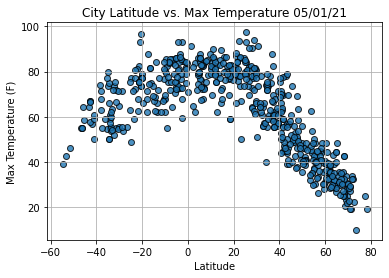

In [51]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig1.png")

# Show plot.
plt.show()

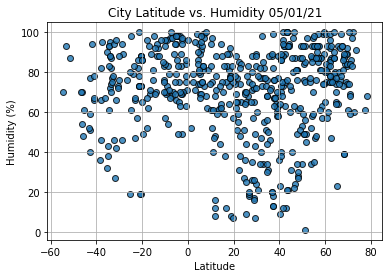

In [53]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig2.png")
# Show plot.
plt.show()

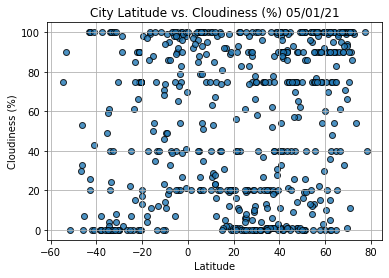

In [55]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig3.png")
# Show plot.
plt.show()